In [1]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [22]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt

# 定義梯度下降批量
batch_size = 256
# 定義分類數量
num_classes = 10
# 定義訓練週期
epochs = 15

# 定義圖像寬、高
img_rows, img_cols = 28, 28

# 載入 MNIST 訓練資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 保留原始資料，供 cross tab function 使用
y_test_org = y_test

# channels_first: 色彩通道(R/G/B)資料(深度)放在第2維度，第3、4維度放置寬與高
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: # channels_last: 色彩通道(R/G/B)資料(深度)放在第4維度，第2、3維度放置寬與高
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 轉換色彩 0~255 資料為 0~1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# y 值轉成 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.7006 - accuracy: 0.8058 - val_loss: 0.2064 - val_accuracy: 0.9400
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1720 - accuracy: 0.9497 - val_loss: 0.0993 - val_accuracy: 0.9709
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1081 - accuracy: 0.9683 - val_loss: 0.0700 - val_accuracy: 0.9777
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0834 - accuracy: 0.9755 - val_loss: 0.0551 - val_accuracy: 0.9822
Epoch 5/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.0696 - accuracy: 0.9800 - val_loss: 0.0485 - val_accuracy: 0.9848
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0615 - accuracy: 0.9818 - val_loss: 0.0454 - val_accuracy: 0.9851
Epoch 7/10
60000/60000 [==============================] - 2s 42us/st

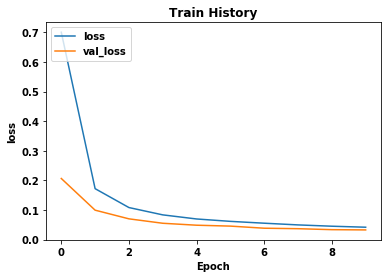

In [3]:
#####---------------------------------------HW2 改良版模型---------------------------------------#####
model2=Sequential()
# 第一層conv2D更改Mask大小從3->9
model2.add(Conv2D(32, kernel_size=(9, 9),activation='relu',input_shape=input_shape))

model2.add(Conv2D(64, (3, 3), activation='relu'))

# 建立池化層，池化大小=2x2，取最大值
model2.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model2.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model2.add(Flatten())
# 更改數值成0.5->0.25
model2.add(Dropout(0.25))
# 使用 softmax activation function，將結果分類
model2.add(Dense(num_classes, activation='softmax'))

# 更改optimizer Adadelta->Adam
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# 更改batch size 256->1024 epochs 15->10
train_history = model2.fit(x_train, y_train,
          batch_size=1024,
          epochs=10,
          #verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
#model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.3633 - accuracy: 0.8892 - val_loss: 0.0845 - val_accuracy: 0.9732
Epoch 2/15
60000/60000 [==============================] - 4s 75us/step - loss: 0.1082 - accuracy: 0.9677 - val_loss: 0.0498 - val_accuracy: 0.9832
Epoch 3/15
60000/60000 [==============================] - 4s 75us/step - loss: 0.0777 - accuracy: 0.9775 - val_loss: 0.0390 - val_accuracy: 0.9869
Epoch 4/15
60000/60000 [==============================] - 4s 75us/step - loss: 0.0623 - accuracy: 0.9812 - val_loss: 0.0367 - val_accuracy: 0.9867
Epoch 5/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.0346 - val_accuracy: 0.9887
Epoch 6/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0317 - val_accuracy: 0.9890
Epoch 7/15
60000/60000 [==============================] - 4s 74us/st

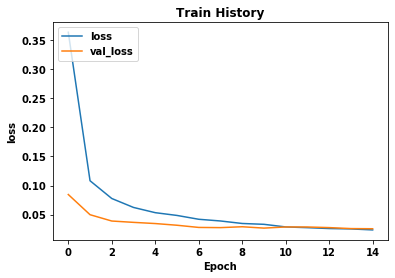

In [4]:
#####---------------------------------------尚未修改的模型---------------------------------------#####

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# 全連接層: 128個output
model.add(Dense(128, activation='relu'))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
model.add(Dropout(0.5))
# 使用 softmax activation function，將結果分類
model.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
# model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 11s 180us/step - loss: 0.2715 - accuracy: 0.9166 - val_loss: 0.0648 - val_accuracy: 0.9806
Epoch 2/15
60000/60000 [==============================] - 5s 76us/step - loss: 0.0605 - accuracy: 0.9814 - val_loss: 0.0404 - val_accuracy: 0.9857
Epoch 3/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0418 - val_accuracy: 0.9871
Epoch 4/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0593 - val_accuracy: 0.9814
Epoch 5/15
60000/60000 [==============================] - 4s 74us/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0407 - val_accuracy: 0.9869
Epoch 6/15
60000/60000 [==============================] - 5s 75us/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0391 - val_accuracy: 0.9883
Epoch 7/15
60000/60000 [==============================] - 4s 74us/

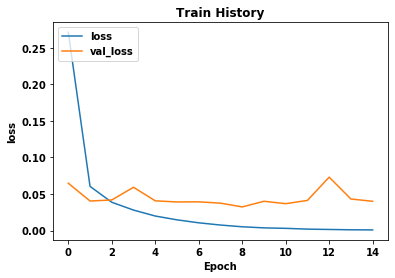

In [3]:
#####---------------------------------------原本模型 刪除兩層Dropout---------------------------------------#####

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# 全連接層: 128個output
model.add(Dense(128, activation='relu'))
# 使用 softmax activation function，將結果分類
model.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
# model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 81us/step - loss: 0.3444 - accuracy: 0.8955 - val_loss: 0.0980 - val_accuracy: 0.9700
Epoch 2/15
60000/60000 [==============================] - 5s 75us/step - loss: 0.1102 - accuracy: 0.9666 - val_loss: 0.0673 - val_accuracy: 0.9795
Epoch 3/15
60000/60000 [==============================] - 5s 76us/step - loss: 0.0846 - accuracy: 0.9745 - val_loss: 0.0544 - val_accuracy: 0.9825
Epoch 4/15
60000/60000 [==============================] - 5s 76us/step - loss: 0.0713 - accuracy: 0.9779 - val_loss: 0.0534 - val_accuracy: 0.9826
Epoch 5/15
60000/60000 [==============================] - 5s 75us/step - loss: 0.0636 - accuracy: 0.9809 - val_loss: 0.0503 - val_accuracy: 0.9823
Epoch 6/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0577 - accuracy: 0.9826 - val_loss: 0.0390 - val_accuracy: 0.9870
Epoch 7/15
60000/60000 [==============================] - 5s 76us/st

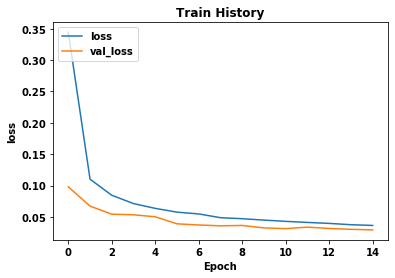

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [19]:
#####---------------------------------------原本模型 刪除第一層Dense---------------------------------------#####

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
model.add(Dropout(0.5))
# 使用 softmax activation function，將結果分類
model.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
# model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 69us/step - loss: 0.3115 - accuracy: 0.9061 - val_loss: 0.1012 - val_accuracy: 0.9702
Epoch 2/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.0785 - accuracy: 0.9767 - val_loss: 0.0671 - val_accuracy: 0.9792
Epoch 3/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0567 - accuracy: 0.9829 - val_loss: 0.0512 - val_accuracy: 0.9828
Epoch 4/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0413 - val_accuracy: 0.9869
Epoch 5/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0385 - accuracy: 0.9883 - val_loss: 0.0406 - val_accuracy: 0.9873
Epoch 6/15
60000/60000 [==============================] - 4s 66us/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0395 - val_accuracy: 0.9868
Epoch 7/15
60000/60000 [==============================] - 4s 66us/st

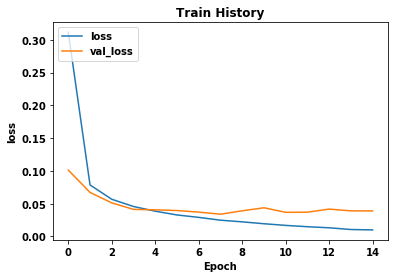

In [17]:
#####------------------------------------原本模型刪除Dropout/1st Dense-------------------------------------#####

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# 使用 softmax activation function，將結果分類
model.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
# model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 118us/step - loss: 0.3808 - accuracy: 0.8819 - val_loss: 0.0870 - val_accuracy: 0.9699
Epoch 2/15
60000/60000 [==============================] - 7s 111us/step - loss: 0.1123 - accuracy: 0.9670 - val_loss: 0.0494 - val_accuracy: 0.9830
Epoch 3/15
60000/60000 [==============================] - 7s 112us/step - loss: 0.0794 - accuracy: 0.9764 - val_loss: 0.0503 - val_accuracy: 0.9828
Epoch 4/15
60000/60000 [==============================] - 7s 112us/step - loss: 0.0645 - accuracy: 0.9802 - val_loss: 0.0356 - val_accuracy: 0.9877
Epoch 5/15
60000/60000 [==============================] - 7s 113us/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.0314 - val_accuracy: 0.9900
Epoch 6/15
60000/60000 [==============================] - 7s 114us/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0310 - val_accuracy: 0.9890
Epoch 7/15
60000/60000 [==============================] - 7s 1

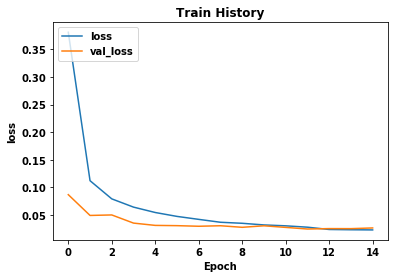

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 1, 1, 128)         1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 1, 1, 10)        

In [47]:
#####---------------------------------------原本模型刪除後面的Dense層改用Conv2D替換---------------------------------------#####

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
#1st Dropout
model.add(Dropout(0.25))
# 1st FC replaced by Conv2D
model.add(Conv2D(128, (12, 12),padding='valid',activation='relu'))
#2nd Dropout
model.add(Dropout(0.5)).
# 2nd FC replaced by Conv2D
model.add(Conv2D(10, (1, 1),padding='valid',activation='softmax'))
model.add(Flatten())
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          #verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
# model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()
model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 114us/step - loss: 0.2855 - accuracy: 0.9124 - val_loss: 0.1226 - val_accuracy: 0.9605
Epoch 2/15
60000/60000 [==============================] - 6s 105us/step - loss: 0.0610 - accuracy: 0.9812 - val_loss: 0.0468 - val_accuracy: 0.9839
Epoch 3/15
60000/60000 [==============================] - 6s 104us/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.0434 - val_accuracy: 0.9861
Epoch 4/15
60000/60000 [==============================] - 6s 104us/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0329 - val_accuracy: 0.9894
Epoch 5/15
60000/60000 [==============================] - 6s 104us/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0339 - val_accuracy: 0.9896
Epoch 6/15
60000/60000 [==============================] - 6s 104us/step - loss: 0.0143 - accuracy: 0.9959 - val_loss: 0.0370 - val_accuracy: 0.9871
Epoch 7/15
60000/60000 [==============================] - 6s 1

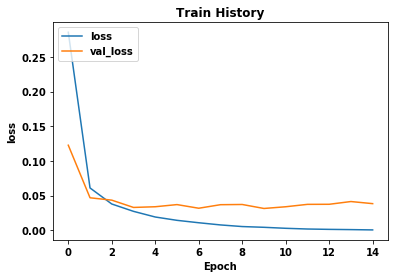

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 1, 1, 128)         1179776   
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 1, 1, 10)          1290      
_________________________________________________________________
flatten_9 (Flatten)          (None, 10)                0         
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
___________________________________________

In [45]:
#####---------------------------------------刪除後面的Dropout且Dense層改用Conv2D替換---------------------------------------#####

# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# 使用 softmax activation function，將結果分類
model.add(Conv2D(128, (12, 12),padding='valid',activation='relu'))
model.add(Conv2D(10, (1, 1),padding='valid',activation='softmax'))
model.add(Flatten())
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          #verbose=1,
          validation_data=(x_test, y_test))
#儲存訓練架構及結果
# model.save('my_model_cnn.h5')

# 顯示損失函數、訓練成果(分數)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show()
model.summary()